In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import *
from scipy import optimize

In [3]:
from wavefunction import *
from wavefunction.wavefunction1d import *
from wavefunction.utils import *

In [4]:
def U_ho(x, args):
    """
    Harmonic oscillator potential
    """
    
    k = args['k']
    x0    = args['x0']
    
    u = 1/2. * k * ((x - x0) ** 2)

    return u

In [5]:
E_CL = 1/8./(2*pi)**2
E_L = (2*pi)**2

phi_min,phi_max = [-pi,pi]
N=750

# E_CL = 5
# E_L = 0.4

# phi_min,phi_max = [-4*pi,4*pi]
# N=750


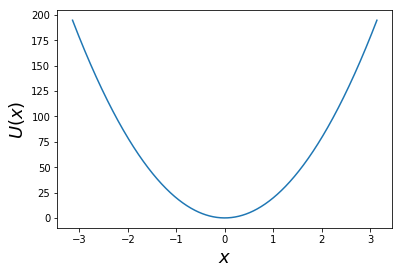

In [6]:
x0=0
x = linspace(phi_min,phi_max,N)+x0
args = {'k': E_L, 'x0': x0}
U = U_ho(x, args);
fig, ax = subplots()

ax.plot(x, U)

# ax.set_ylim(-10, 80)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

In [7]:
K = assemble_K(-4*E_CL,x)

u = assemble_u_potential(U_ho, x, args)
V = assemble_V(u)
H = K + V

evals, evecs = solve_eigenproblem(H)

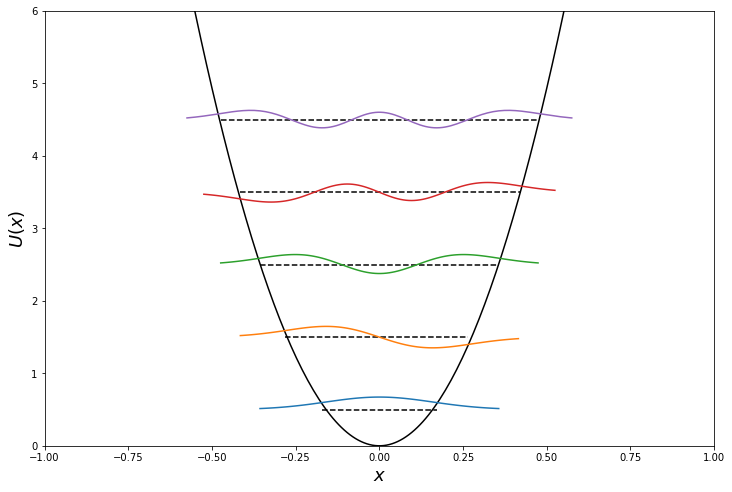

In [8]:
fig, ax = subplots(figsize=(12,8))
U = U_ho(x,args)
ax.plot(x, U, 'k')
for n in range(5):
    Y = evals[n] + evecs[n]

    mask = where(Y > U)    
    ax.plot(x[mask], evals[n].real * ones(shape(x))[mask], 'k--')

    mask = where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real)
    
ax.set_xlim(-1, 1)
ax.set_ylim(0, 6)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

In [9]:
print('Plasma frequency %.3f'% sqrt(8*E_L*E_CL))
diff(evals[0:10].real)

Plasma frequency 1.000


array([0.99965261, 0.99930507, 0.99895735, 0.99860944, 0.99826136,
       0.99791309, 0.99756464, 0.997216  , 0.99686718])